In [ ]:
#importing packages
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

In [ ]:
#analysis
facebook = pd.read_csv("/content/facebook_combined.txt",sep=" ",names=["start_node", "end_node"],)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [ ]:
#data preprocessing
facebook.head()

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [ ]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88234 entries, 0 to 88233
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   start_node  88234 non-null  int64
 1   end_node    88234 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB


In [ ]:
facebook.describe()

,start_node,end_node
count,88234.000000,88234.000000
mean,1864.781773,2154.199130
std,910.292292,893.709532
min,0.000000,1.000000
25%,1160.000000,1600.000000
50%,1983.000000,2259.000000
75%,2423.000000,2631.000000
max,4031.000000,4038.000000


In [ ]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

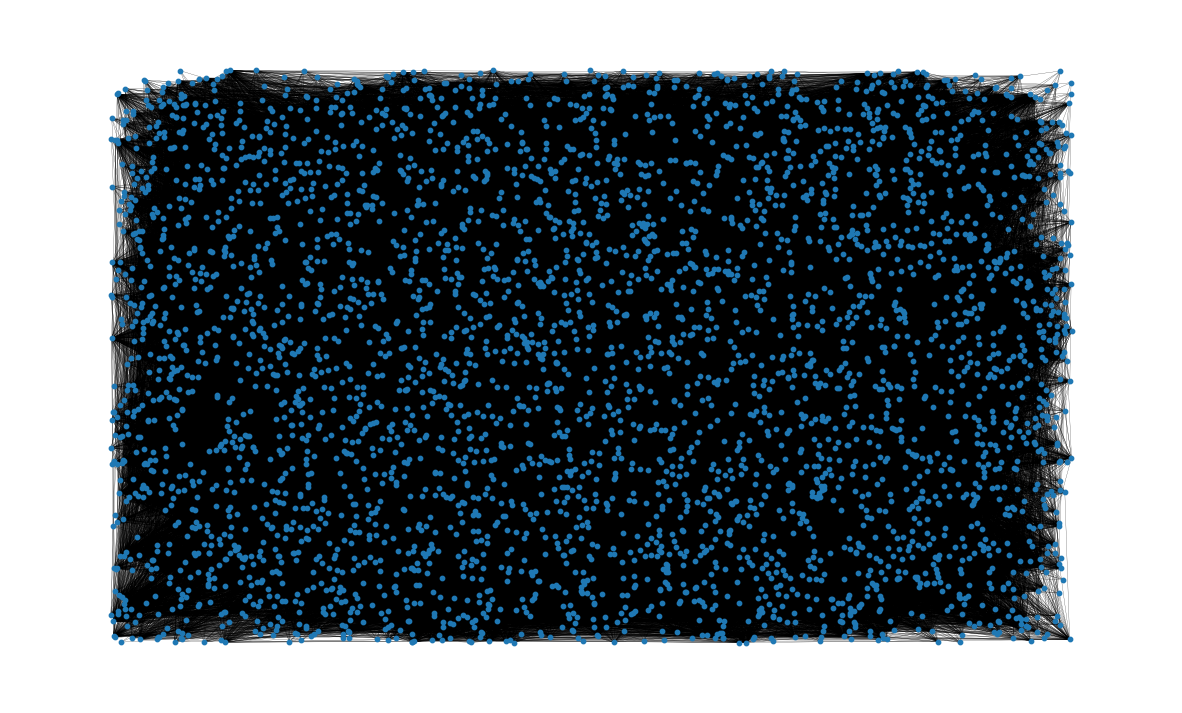

In [ ]:
#data exploration
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

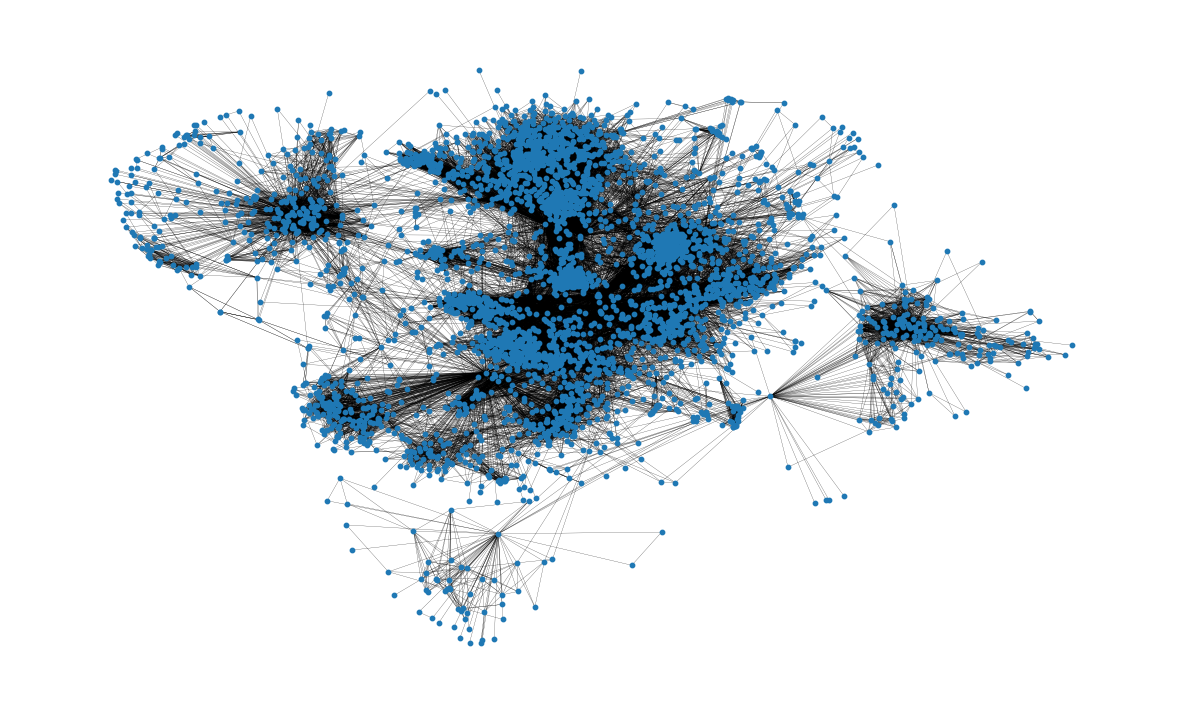

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [ ]:
#attributes
#Total number of nodes in network:

G.number_of_nodes()


4039

In [ ]:
#Total number of edges:

G.number_of_edges()

88234

In [ ]:
np.mean([d for _, d in G.degree()])

43.69101262688784

In [ ]:
#shortest path

shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))


In [ ]:
# Length of shortest path between nodes 0 and 42

shortest_path_lengths[0][42]

1

In [ ]:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

8

In [ ]:
# Compute the average shortest path length for each node

average_path_lengths = [np.mean(list(spl.values())) for spl in shortest_path_lengths.values()]

In [ ]:
# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

In [ ]:
path_lengths = np.zeros(diameter + 1, dtype=int)

In [ ]:
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

In [ ]:
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()


Text(0, 0.5, 'Frequency (%)')

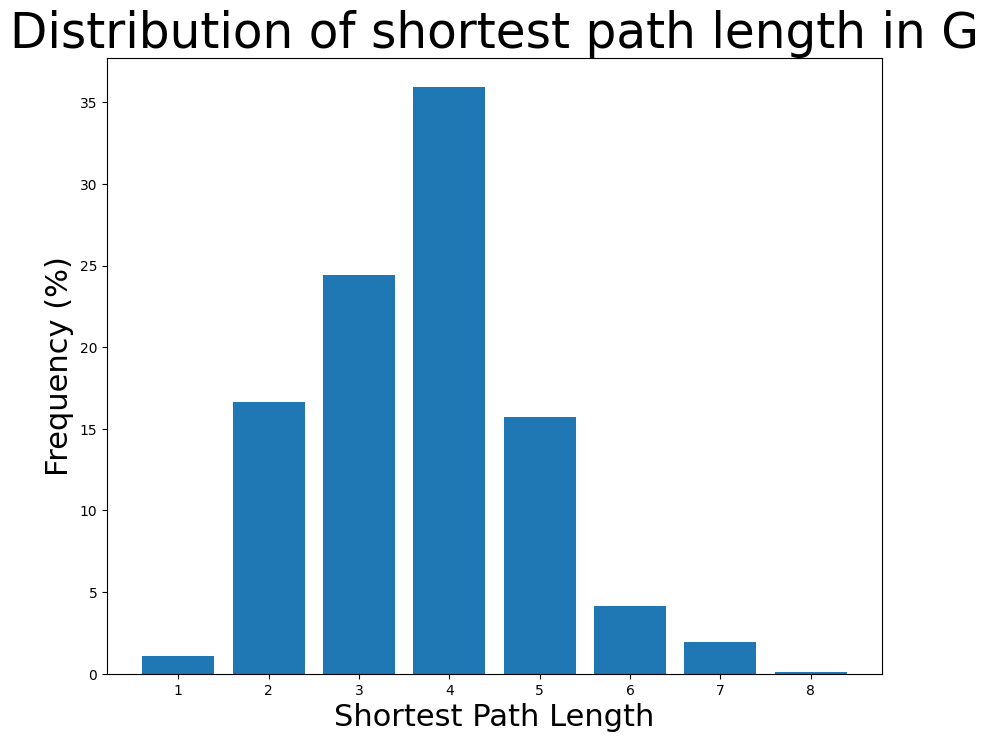

In [ ]:
# Plot the frequency distribution
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title("Distribution of shortest path length in G", fontdict={"size": 35}, loc="center")
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [ ]:
#graph density
nx.density(G)

0.010819963503439287

In [ ]:
#graph components
nx.number_connected_components(G)

1

In [ ]:
#Centrality measures
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354)]

In [ ]:
#number of neighbors
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:5]

[(107, 1045), (1684, 792), (1912, 755), (3437, 547), (0, 347)]

Text(0, 0.5, 'Counts')

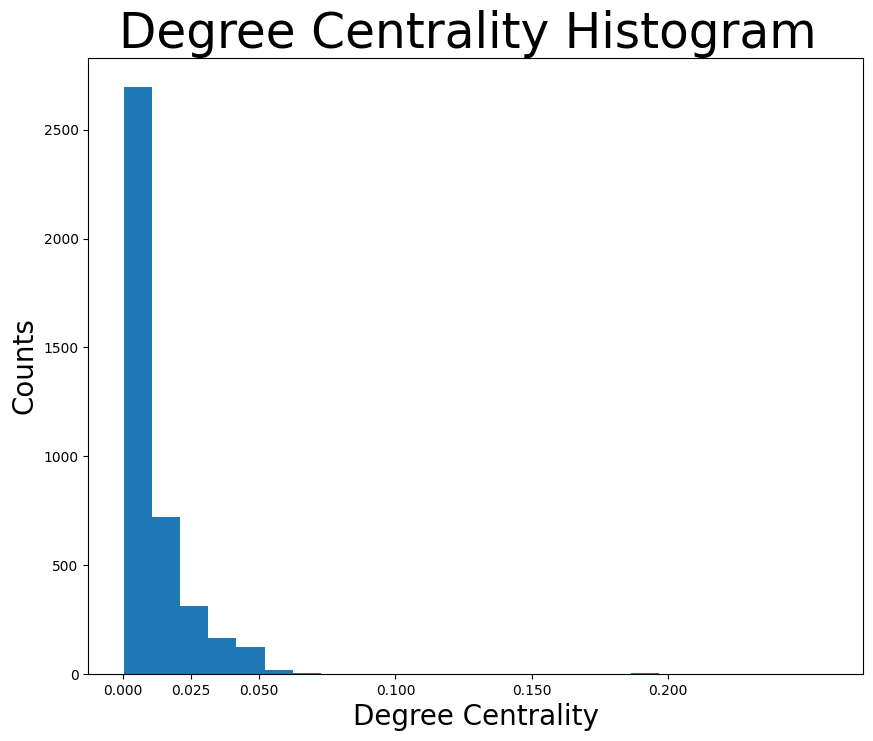

In [ ]:
#distribution of degree centralities
plt.figure(figsize=(10, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

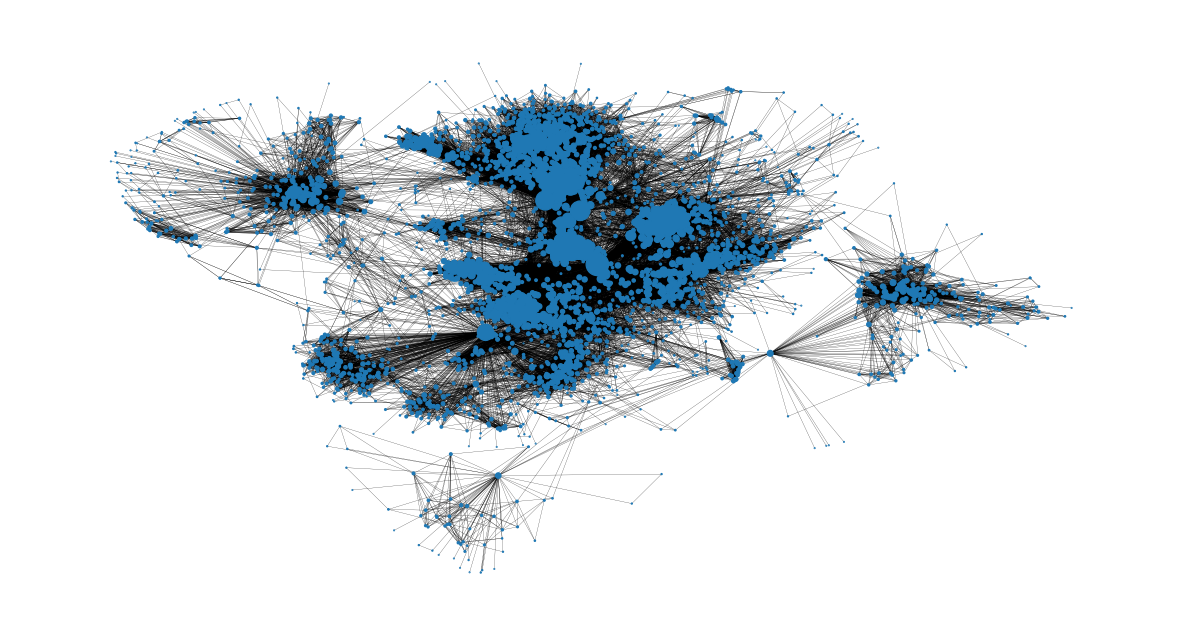

In [ ]:
#highest degree centralities
node_size = [v * 1000 for v in degree_centrality.values()]
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [ ]:
nx.average_clustering(G)

0.6055467186200876

Text(0, 0.5, 'Counts')

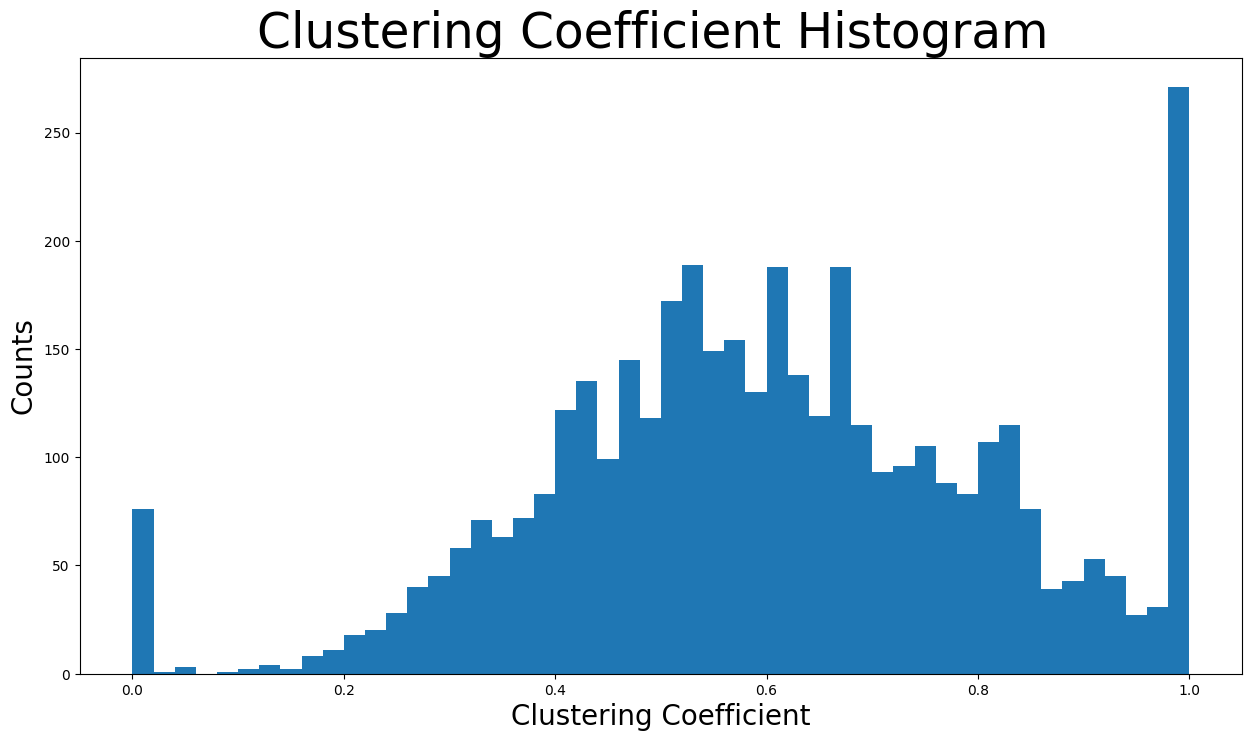

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [ ]:
#network communications
colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

44

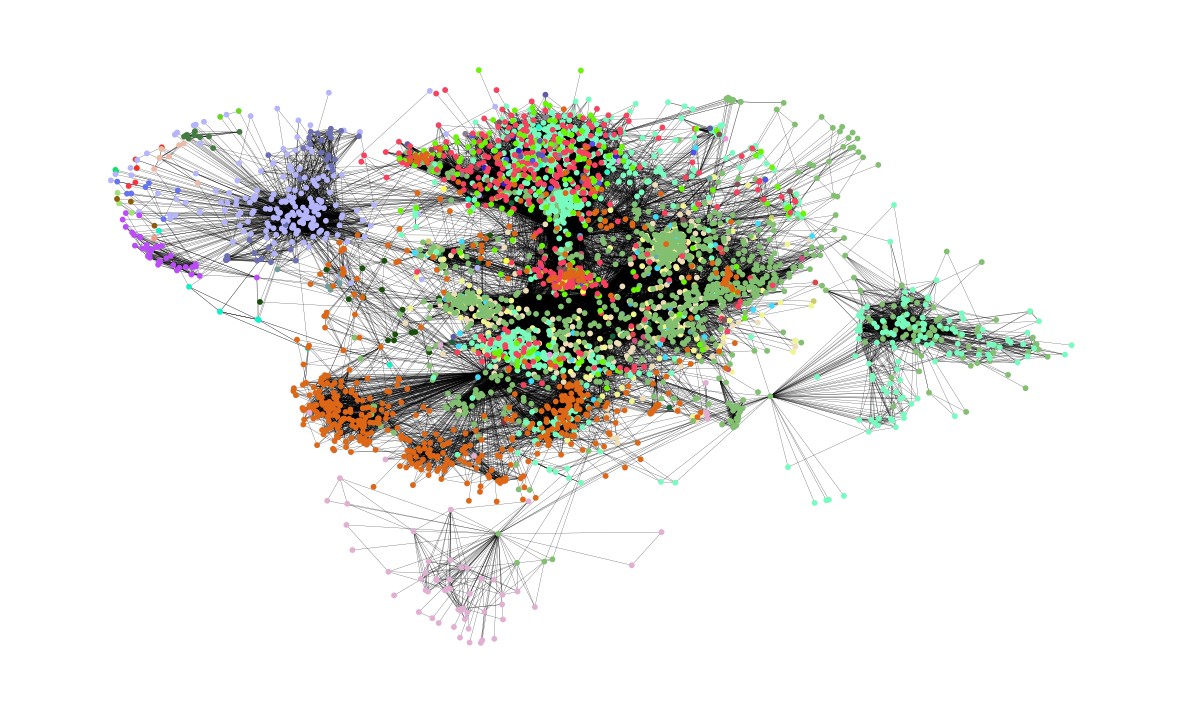

In [ ]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors)

In [ ]:
colors = ["" for x in range(G.number_of_nodes())]
for com in nx.community.asyn_fluidc(G, 8, seed=0):
    color = "#%06X" % randint(0, 0xFFFFFF)
    for node in list(com):
        colors[node] = color

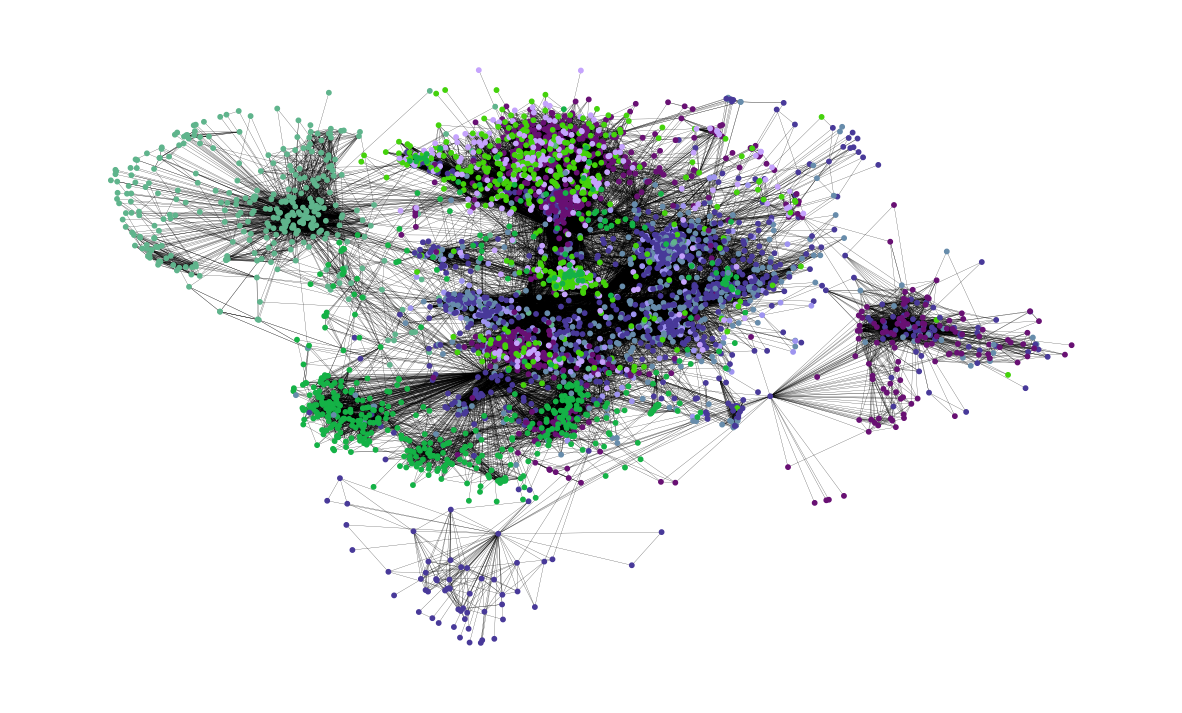

In [ ]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors)